In [6]:
import pandas as pd
from pysal.lib import weights
from scipy.sparse import csr_matrix
import scipy

In [10]:



### csr_matrix稀疏矩阵共有属性
  # 矩阵形状 shape
  # 数据类型 dtype
  # 矩阵维度 ndim
  # 非零个数 nnz
  # 非零值, 一维数组 data

### COO 特有的
  # 矩阵行索引 row
  # 矩阵列索引 col

# 从CSV文件中读取空间权重矩阵
csv_path = "D:\Lenovo\Desktop\云南大学\大创\程序代码\空间权重矩阵测试\高斯权函数矩阵.csv"
spatial_weights_df = pd.read_csv(csv_path, index_col=0) #csv转dataframe

sparse_matrix=scipy.sparse.csr_matrix(spatial_weights_df.values)

# 创建空间权重对象,WSP 类是pysal中的一个子类，表示"weights spatial",专用于表示处理空间权重矩阵的子类
wsp = weights.WSP(sparse_matrix)
#WSP无法直接参与Moran'I指数计算，所以需要将它转为w类
w=weights.W.from_WSP(wsp)
print(type(w))

# 如果权重矩阵是对称的，可以使用Sym的子类
# w = weights.WSP(symmetrize='True', values=spatial_weights_df.values)

# 打印空间权重矩阵
print(w.sparse)


<class 'libpysal.weights.weights.W'>
  (0, 0)	1.0
  (0, 1)	0.9976850411986142
  (0, 2)	0.9949688434478914
  (0, 3)	0.9953381775433456
  (0, 4)	0.917702155990408
  (0, 5)	0.9884491023615344
  (0, 6)	0.9715349451818324
  (0, 7)	0.9972287629681184
  (0, 8)	0.9754722053678642
  (0, 9)	0.9449566222528648
  (0, 10)	0.986085913273798
  (0, 11)	0.9543217013024128
  (0, 12)	0.9676202384865428
  (0, 13)	0.9848420162805956
  (0, 14)	0.8963472818079518
  (0, 15)	0.8827718023697354
  (0, 16)	0.9494600894481572
  (0, 17)	0.9258932413329678
  (0, 18)	0.8439063942511318
  (0, 19)	0.8197614639699042
  (0, 20)	0.8144062040401563
  (0, 21)	0.8366543018177395
  (0, 22)	0.7793754117042352
  (0, 23)	0.9429445865170032
  (0, 24)	0.9424533743006496
  :	:
  (128, 104)	0.0471945617400746
  (128, 105)	0.7232223290061264
  (128, 106)	0.7209679305384177
  (128, 107)	0.6073435439685264
  (128, 108)	0.6974665026819645
  (128, 109)	0.5644103611841405
  (128, 110)	0.5172713464269173
  (128, 111)	0.6167637740553066
  (

In [20]:
csv_path = "D:\Lenovo\Desktop\云南大学\大创\程序代码\空间权重矩阵测试\反距离权函数矩阵.csv"
spatial_weights_df = pd.read_csv(csv_path, index_col=0) #csv转dataframe

sparse_matrix=scipy.sparse.csr_matrix(spatial_weights_df.values)

# 创建空间权重对象,WSP 类是pysal中的一个子类，表示"weights spatial",专用于表示处理空间权重矩阵的子类
wsp = weights.WSP(sparse_matrix)
#WSP无法直接参与Moran'I指数计算，所以需要将它转为w类
w=weights.W.from_WSP(wsp)
print(type(w))

# 如果权重矩阵是对称的，可以使用Sym的子类
# w = weights.WSP(symmetrize='True', values=spatial_weights_df.values)

# 打印空间权重矩阵
print(w.sparse)

<class 'libpysal.weights.weights.W'>
  (0, 1)	4.895990066624156e-05
  (0, 2)	3.318810323567618e-05
  (0, 3)	3.448091213088139e-05
  (0, 5)	2.1867325972015998e-05
  (0, 6)	1.3870109415880456e-05
  (0, 7)	4.474305968087851e-05
  (0, 8)	1.4956976161930696e-05
  (0, 10)	1.9912090593288373e-05
  (0, 12)	1.2991609647284856e-05
  (0, 13)	1.9071584754829804e-05
  (0, 27)	1.1579909861349524e-05
  (0, 31)	1.4080302243289328e-05
  (0, 72)	1.4028494303143347e-05
  (0, 80)	1.2015402603607309e-05
  (1, 0)	4.895990066624156e-05
  (1, 2)	3.81341278338048e-05
  (1, 3)	2.158156823106575e-05
  (1, 5)	2.035132233292824e-05
  (1, 6)	1.177270182395745e-05
  (1, 7)	3.288326138846417e-05
  (1, 8)	1.7554872977064618e-05
  (1, 10)	3.284226069205312e-05
  (1, 11)	1.1532534480808888e-05
  (1, 12)	1.7057688904457798e-05
  (1, 13)	1.4078186122601138e-05
  :	:
  (119, 34)	1.5318360084627173e-05
  (119, 36)	1.4641569979734617e-05
  (119, 118)	1.931187680693757e-05
  (119, 120)	2.132802320570782e-05
  (119, 121)	1.688

Moran's I: 0.6850939713953467
P-value: 0.001
Z-score: 11.30976404168778


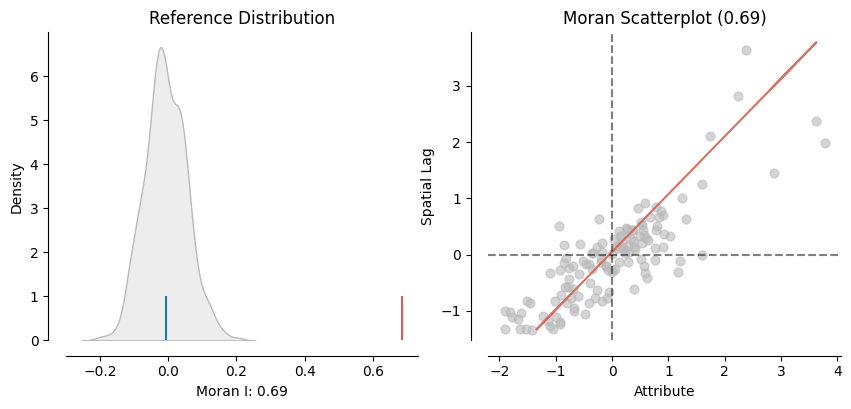

In [21]:
import geopandas as gpd
from pysal.explore import esda
from splot.esda import plot_moran
import matplotlib.pyplot as plt

shapefile_path = "D:\Lenovo\Desktop\云南大学\大创\复杂地形条件对空间关系构建的影响研究项目\data\构建权重矩阵示例数据\CTCI_墨卡托投影.shp"
gdf = gpd.read_file(shapefile_path)
moran = esda.Moran(gdf['CTCI'], w)


# 输出莫兰指数和p值
print('Moran\'s I:', moran.I)
print('P-value:', moran.p_sim)
print('Z-score:', moran.z_sim)



# 绘制莫兰散点图
plot_moran(moran, zstandard=True, figsize=(10, 4))
plt.show()